# Classification Machine Learning Model

This notebook reads a data file created through a previous ETL process and applies a classification machine learning model to determine, from an image, if the image is "Male", "Female" or "Other" ("Alien", "Ape" or "Zombie"). 

The ETL process is contained in the notebook:

* Crypto_Punks_ETL_FINAL.ipynb

Note: Please refer to the project ERD for details on the data tables and structures.

In [1]:
# Import Dependencies

import os
import sqlite3 # NOT NEEDED
import requests # NOT NEEDED FOR THE MOMENT
import json

# Import MongoDB libraries for database management 
import pymongo # NOT NEEDED
from pymongo import MongoClient # NOT NEEDED

# Import data manipulation libraries
import numpy as np
import pandas as pd
import random

# Import machine learning libraries
from scipy.optimize import curve_fit #NOT NEEDED FOR THE MOMENT
from scipy.special import zeta # NOT NEEDED FOR THE MOMENT

# Import image and plotting libraries
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

#Import the Machine Learning libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical #NOT NEEDED FOR THE MOMENT
import sklearn as skl

plt.style.use('fivethirtyeight')

## Read the Data File

In [2]:
# Import the machine learning dataframe file

In [3]:
machine_learning_df = pd.read_csv("Data/machine_learning.csv")
machine_learning_df.head()

,punk_id,type,accessories,type_ML,glasses_ML
0,0,Female,"['Green Eye Shadow', 'Earring', 'Blonde Bob']",1,0
1,1,Male,"['Smile', 'Mohawk']",0,0
2,2,Female,['Wild Hair'],1,0
3,3,Male,"['Wild Hair', 'Nerd Glasses', 'Pipe']",0,1
4,4,Male,"['Big Shades', 'Wild Hair', 'Earring', 'Goat']",0,1


In [4]:
# Create a list for the target type classifications
type_classification = ["Male","Female","Other"]

## Inspect the Shape of a Random Bit Map Array

In [5]:
id = random.randint(0,9999)

# set the fillename based on that id
file_to_open = ("data/images/"+str(id)+".png")
    
# Read the RGB image for that id
rgb_image = Image.open(file_to_open)

# Convert the image to a bit array
rgb_bit_map = np.asarray(rgb_image)

# Inspect the shape of the array
rgb_bit_map.shape

(24, 24, 4)

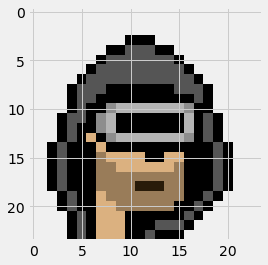

In [6]:
# Plot the RGB image
img = plt.imshow(rgb_bit_map)

## Add Image Bit Map Array for each Punk_ID

In [7]:
######################################################################
# Loop through the punk_ids, search for the corresponding image file, 
# convert the file to a bit map array, and store the array as a new 
# field in the crypto_punks_df
######################################################################

In [8]:
# Create empty lists to store the machine learning and bitmap data
machine_learning_list = []
image_bitmap_list =[]

In [9]:
for i in range(10000):
    punk_id = i
    type_ML = machine_learning_df.loc[i, "type_ML"]
    
    glasses_ML = machine_learning_df.loc[i, "glasses_ML"]
    
    file_to_open = ("Data/images/"+str(i)+".png")
    rgb_image = Image.open(file_to_open)
    
    # Convert the image to a bitmap array
    rgb_bit_map = np.asarray(rgb_image)
    
    # Add the punk_id and bitmap array to the image_bitmap_list as
    # a dictionary
    image_bitmap_list.append({"punk_id": punk_id, 
                              "image_bitmap": rgb_bit_map
                             })
    
    # Normalize the bitmap array for use by the Machine Learning model
    norm_rgb_bit_map = rgb_bit_map / 255
    
    # Add the new data to the dictionary
    machine_learning_list.append({"punk_id": punk_id,
                                  "type_ML": type_ML,
                                  "glasses_ML": glasses_ML,
                                  "normalized_bitmap": norm_rgb_bit_map
                                 })
    

In [10]:
# Inspect the bitmap list
image_bitmap_list

[{'punk_id': 0,
  'image_bitmap': array([[[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
  
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
  
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
  
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0]],
  
         [[0, 0, 0, 0],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          ...,
          [0, 0, 0, 0],
          [0, 0, 0, 0],
 

In [11]:
# Inspect the machine learning list
machine_learning_list

[{'punk_id': 0,
  'type_ML': 1,
  'glasses_ML': 0,
  'normalized_bitmap': array([[[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          ...,
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
  
         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          ...,
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
  
         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          ...,
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          ...,
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.]],
  
         [[0., 0., 0., 0.],
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
          ...,
          [0., 0., 0., 0.],
          [0., 0., 0., 0.],
        

In [12]:
print(len(image_bitmap_list))

10000


In [13]:
print(len(machine_learning_list))

10000


## Machine Learning Model - MAKE A CLASSIFICATION PREDICTION (IS MALE, FEMALE OR OTHER)

In [14]:
#Import the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical #NOT NEEDED FOR THE MOMENT
import sklearn as skl

plt.style.use('fivethirtyeight')

In [15]:
# Create a list of the target training data
X_list =[]
y_list =[]

for i in range(len(machine_learning_list)):
    X_list.append(machine_learning_list[i]["normalized_bitmap"])
    y_list.append([machine_learning_list[i]["type_ML"]])

In [16]:
#DECLARE X and Y variables as np.arrays
X = np.asarray(X_list)
y = np.asarray(y_list)

In [17]:
print(X.shape)
print(y.shape)

(10000, 24, 24, 4)
(10000, 1)


In [18]:
# Inspect X
X

array([[[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
 

In [19]:
# Inspect y
y

array([[1],
       [0],
       [1],
       ...,
       [2],
       [1],
       [1]])

In [20]:
#get the shape of the arrays
print(X.shape, y.shape)

(10000, 24, 24, 4) (10000, 1)


In [21]:
# Use sklearn to split dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [22]:
# Get the shape of the arrays
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (7500, 24, 24, 4)
y_train shape: (7500, 1)
X_test shape: (2500, 24, 24, 4)
y_test shape: (2500, 1)


In [23]:
# Inspect the X_train data
X_train

array([[[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        ...,

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
 

In [24]:
# Inspect the y_train data
y_train

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [25]:
print(X_train.dtype)
print(y_train.dtype)
print(X_test.dtype)
print(y_test.dtype)

float64
int64
float64
int64


In [26]:
# Convert the labels into a set of 3 catagorical nummbers 
# to input into the reunral network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [27]:
# Get the shape of the arrays
#  print(type(X_train))
#  print(type(y_train))
#  print(type(X_test))
#  print(type(y_test))

In [28]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

Metal device set to: Apple M1 Pro


2022-01-08 14:35:45.541595: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-08 14:35:45.541728: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [29]:
#Take a look at random image as an array
index = random.randrange(0,len(X_train),1)
print(X_train[index])
print(y_train_one_hot[index])

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
[1. 0. 0.]


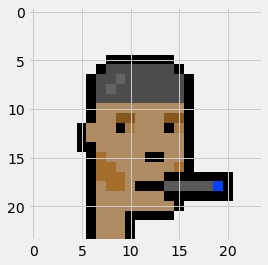

In [30]:
#Show the image as a picture

img = plt.imshow(X_train[index])

In [31]:
#Get the image label 
print('The image label is ', y_train[index])

The image label is  [0]


In [32]:
# Get the image classification

#Print the image class
print('The image class is: ', type_classification[int(y_train[index])])

The image class is:  Male


In [33]:
#create the models architecture
model= Sequential()

#Add the first layer
model.add( Conv2D(32,(5,5), activation='relu', input_shape=(24,24,4)))

#Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add another convolution layer
model.add( Conv2D(32,(5,5), activation='relu'))

#Add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#Add a flattening layer
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

#Add a drop out layer
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#Add a layer with 3 output neurons
model.add(Dense(3, activation='softmax'))

In [34]:
#Compile the model
model.compile(loss='categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [35]:
#Train the model
hist = model.fit(X_train, y_train_one_hot,
                batch_size = 256, 
                epochs = 10, 
                validation_split = 0.2)

2022-01-08 14:35:45.822068: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-08 14:35:45.977457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/10
24/24 [==============================] - 1s 22ms/step - loss: 0.4855 - accuracy: 0.7868 - val_loss: 0.0897 - val_accuracy: 0.9820
Epoch 2/10
 5/24 [=====>........................] - ETA: 0s - loss: 0.0785 - accuracy: 0.9859

2022-01-08 14:35:46.581913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 0s 19ms/step - loss: 0.0740 - accuracy: 0.9862 - val_loss: 0.0548 - val_accuracy: 0.9893
Epoch 3/10
24/24 [==============================] - 0s 18ms/step - loss: 0.0506 - accuracy: 0.9877 - val_loss: 0.0348 - val_accuracy: 0.9887
Epoch 4/10
24/24 [==============================] - 0s 15ms/step - loss: 0.0307 - accuracy: 0.9885 - val_loss: 0.0287 - val_accuracy: 0.9893
Epoch 5/10
24/24 [==============================] - 0s 16ms/step - loss: 0.0251 - accuracy: 0.9910 - val_loss: 0.0071 - val_accuracy: 0.9980
Epoch 6/10
24/24 [==============================] - 0s 16ms/step - loss: 0.0062 - accuracy: 0.9978 - val_loss: 0.0037 - val_accuracy: 0.9987
Epoch 7/10
24/24 [==============================] - 0s 17ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0046 - val_accuracy: 0.9987
Epoch 8/10
24/24 [==============================] - 0s 17ms/step - loss: 0.0062 - accuracy: 0.9978 - val_loss: 0.0070 - val_accuracy: 0.9980
Epoch 9/10
24/24 [======

In [36]:
#Evaluate the model using the test data set
model.evaluate(X_test, y_test_one_hot)[1]

79/79 [==============================] - 1s 7ms/step - loss: 0.0023 - accuracy: 0.9992


0.9992000460624695

In [37]:
# View a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 32)        3232      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 1000)             

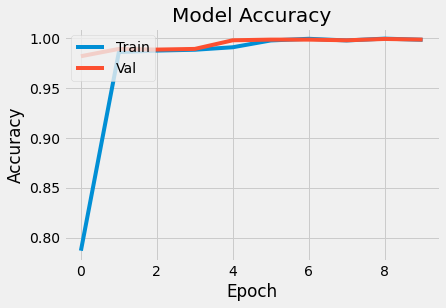

In [38]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

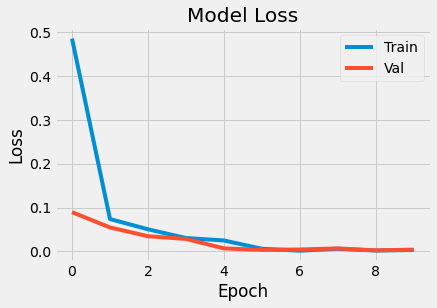

In [39]:
#Visualize the model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

## Use the Model to Make Predictions

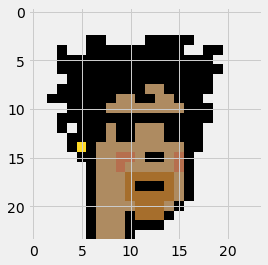

In [40]:
# Read a random Crypto Punk image and predict the type
id = random.randint(0,9999)

# set the fillename based on that id
file_to_open = ("data/images/"+str(id)+".png")
    
# Read the predict RGB image for that id
pred_rgb_image = Image.open(file_to_open)

# Convert the image to a bit array
pred_rgb_bitmap = np.array(pred_rgb_image)

#Show the image as a picture
img = plt.imshow(pred_rgb_bitmap)

In [41]:
# Inspect shape
print(pred_rgb_bitmap.shape)

(24, 24, 4)


In [42]:
images_list = []
images_list.append(np.array(pred_rgb_bitmap))
image_pred = np.asarray(images_list)

In [43]:
# Get the models predictions
predictions = model.predict(image_pred)
    
# Show the predictions
predictions

2022-01-08 14:35:51.211189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[1., 0., 0.]], dtype=float32)

In [44]:
model.evaluate(X_test,y_test_one_hot)

79/79 [==============================] - 1s 7ms/step - loss: 0.0023 - accuracy: 0.9992


[0.002319443505257368, 0.9992000460624695]

In [45]:
pred_list = model.predict(X_test).round(0)
pred_list

# compare pred_list to y_test to compare the predictions

2022-01-08 14:35:51.833847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [46]:
# Sort the predictions from the least to the greastest
list_index = [0,1,2] 
x = predictions

for i in range(3):
    for j in range (3):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
            
#Shoe the sorted labels in order
print(list_index)

[0, 1, 2]


In [47]:
# Print the 3 predictions
for i in range(3):
    print(type_classification[list_index[i]], ':', round(predictions[0][list_index[i]]*100,2), '%')

Male : 100.0 %
Female : 0.0 %
Other : 0.0 %


In [48]:
# prediction_probability = model.predict_proba(X_test,y_test_one_hot)
# prediction_probability

## Run the predictions for all the images

In [49]:
# Make a copy of the input dataframe to store the predictions 
# and drop un-needed columns
type_predictions_df = machine_learning_df.drop(columns=["glasses_ML"])
type_predictions_df.head()

,punk_id,type,accessories,type_ML
0,0,Female,"['Green Eye Shadow', 'Earring', 'Blonde Bob']",1
1,1,Male,"['Smile', 'Mohawk']",0
2,2,Female,['Wild Hair'],1
3,3,Male,"['Wild Hair', 'Nerd Glasses', 'Pipe']",0
4,4,Male,"['Big Shades', 'Wild Hair', 'Earring', 'Goat']",0


In [50]:
# Loop through each punk_id image and add the prediction to the dataframe

# 1. Create a list of the punk id's to loop through
punk_ids = type_predictions_df['punk_id'].tolist()

# 2. Create an empty list to store the images
images_list = []

# 3. Loop through the ids and store the bitmap images to the list
for id in punk_ids:

    # set the fillename based on that id
    file_to_open = ("data/images/"+str(id)+".png")
    
    # Read the predict RGB image for that id
    pred_rgb_image = Image.open(file_to_open)

    # Convert the image to a bit array
    pred_rgb_bitmap = np.array(pred_rgb_image)

    images_list.append(np.array(pred_rgb_bitmap))

In [51]:
# Change the shape of the object
image_pred = np.asarray(images_list)

In [52]:
# Process all predictions from the list
pred_list = model.predict(image_pred).round(0)
pred_list

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [53]:
# Add the predictions to the dataframe
print(len(pred_list))

for i in range(len(pred_list)):
    for type in range(3):
        if pred_list[i][type] == 1:
            type_predictions_df.loc[i,"type_PRED"] = type

# Inspect the dataframe    
type_predictions_df.head()

10000


,punk_id,type,accessories,type_ML,type_PRED
0,0,Female,"['Green Eye Shadow', 'Earring', 'Blonde Bob']",1,1.0
1,1,Male,"['Smile', 'Mohawk']",0,0.0
2,2,Female,['Wild Hair'],1,1.0
3,3,Male,"['Wild Hair', 'Nerd Glasses', 'Pipe']",0,0.0
4,4,Male,"['Big Shades', 'Wild Hair', 'Earring', 'Goat']",0,0.0


In [54]:
# Inspect the data types
type_predictions_df.dtypes

punk_id          int64
type            object
accessories     object
type_ML          int64
type_PRED      float64
dtype: object

In [55]:
# Change the prediction data type to integer
type_predictions_df["type_PRED"] = type_predictions_df["type_PRED"].astype(int)
type_predictions_df.head() 

,punk_id,type,accessories,type_ML,type_PRED
0,0,Female,"['Green Eye Shadow', 'Earring', 'Blonde Bob']",1,1
1,1,Male,"['Smile', 'Mohawk']",0,0
2,2,Female,['Wild Hair'],1,1
3,3,Male,"['Wild Hair', 'Nerd Glasses', 'Pipe']",0,0
4,4,Male,"['Big Shades', 'Wild Hair', 'Earring', 'Goat']",0,0


In [56]:
# Find the incorrect predictions
incorrect_pred_df = type_predictions_df[type_predictions_df["type_ML"] != type_predictions_df["type_PRED"] ]
incorrect_pred_df

,punk_id,type,accessories,type_ML,type_PRED
2924,2924,Ape,['Hoodie'],2,1
5056,5056,Male,"['Beanie', 'Luxurious Beard', 'Earring', 'VR']",0,2


In [57]:
######################################################################
# EXPORT THE DATAFRAME AS A CSV FILE
######################################################################

type_predictions_df.to_csv(r'Data/type_predictions.csv', index = False)